# 2. Correlation Matrix Chart

This notebook show the correlation between the different pathologies induced.

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Current work
print(os.getcwd())
# Change directory 2 level up
os.chdir("..")
os.chdir("..")
os.chdir("..")
print(os.getcwd())
# Look for the file in the directory
print(os.listdir())

/tmp/ipykernel_70797/909606005.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


/home/jose/Git/SE-AP/experiments/experiment_1/notebooks
/home/jose/Git/SE-AP
['models', '.pre-commit-config.yaml', 'aaa.png', 'demos', '.gitignore', 'experiments', 'aqui.csv', 'include', '.git', '.env', 'README.md', 'output.png', '.env-example', 'LICENSE', 'aqui;']


### Experiment configuration

In [2]:
model = "gpt-3.5-turbo"
temperature = 0.9
prompt_technique = "naive"

Show how the data is structured

In [3]:
data = pd.read_csv(f'experiments/experiment_1/results/{model}/scores_{prompt_technique}_{model}_{temperature}.csv')
data[data['Iteration'] == 1]

,Depression,Trait Anxiety,Eating Disorder,Alcohol Addiction,Impulsivity,Schizophrenia,Obsessive Compulsive Disorder,Apathy,Social Anxiety,Induced Pathology,Iteration
0,0.500000,0.316667,0.038462,0.025,0.355556,0.093023,0.000000,0.296296,0.083333,No Pathology,1
1,0.700000,0.950000,0.205128,0.650,0.600000,0.767442,0.666667,0.611111,0.805556,Depression,1
2,0.716667,0.833333,0.358974,0.250,0.588889,0.325581,0.600000,0.611111,0.631944,Trait Anxiety,1
3,0.750000,0.916667,0.564103,0.075,0.555556,0.674419,0.650000,0.481481,0.722222,Eating Disorder,1
4,0.683333,0.866667,0.423077,0.750,0.711111,0.790698,0.566667,0.574074,0.548611,Alcohol Addiction,1
5,0.666667,0.833333,0.307692,0.750,0.755556,0.581395,0.766667,0.370370,0.548611,Impulsivity,1
6,0.766667,0.900000,0.384615,0.750,0.577778,0.813953,0.700000,0.500000,0.638889,Schizophrenia,1
7,0.783333,0.916667,0.358974,0.450,0.577778,0.093023,0.716667,0.537037,0.784722,Obsessive Compulsive Disorder,1
8,0.566667,0.933333,0.025641,0.200,0.588889,0.511628,0.233333,0.685185,0.500000,Apathy,1
9,0.750000,0.850000,0.179487,0.100,0.577778,0.418605,0.550000,0.537037,0.652778,Social Anxiety,1


Tranpose the dataframe in order to calculate the correlation between the induced pathologies.

In [4]:
iterations = range(1, 101)
transposed_dfs = []

for iteration in iterations:
    df_iteration = data[data['Iteration'] == iteration].reset_index(drop=True)
    
    df_transposed = df_iteration.set_index('Induced Pathology').T[:-1]
    
    df_transposed = df_transposed.reset_index().rename(columns={'index': 'Scoring Type'})
    df_transposed['Iteration'] = iteration
    
    reordered_cols = ['No Pathology','Depression', 'Trait Anxiety', 'Eating Disorder', 'Alcohol Addiction', 'Impulsivity', 'Schizophrenia', 'Obsessive Compulsive Disorder', 'Apathy', 'Social Anxiety','Scoring Type', 'Iteration']
    df_transposed = df_transposed[reordered_cols]
    
    transposed_dfs.append(df_transposed)

final_df = pd.concat(transposed_dfs).reset_index(drop=True)

final_df.to_csv(f'aqui;',index=False)

final_df[final_df['Iteration'] == 1]

Induced Pathology,No Pathology,Depression,Trait Anxiety,Eating Disorder,Alcohol Addiction,Impulsivity,Schizophrenia,Obsessive Compulsive Disorder,Apathy,Social Anxiety,Scoring Type,Iteration
0,0.500000,0.700000,0.716667,0.750000,0.683333,0.666667,0.766667,0.783333,0.566667,0.750000,Depression,1
1,0.316667,0.950000,0.833333,0.916667,0.866667,0.833333,0.900000,0.916667,0.933333,0.850000,Trait Anxiety,1
2,0.038462,0.205128,0.358974,0.564103,0.423077,0.307692,0.384615,0.358974,0.025641,0.179487,Eating Disorder,1
3,0.025000,0.650000,0.250000,0.075000,0.750000,0.750000,0.750000,0.450000,0.200000,0.100000,Alcohol Addiction,1
4,0.355556,0.600000,0.588889,0.555556,0.711111,0.755556,0.577778,0.577778,0.588889,0.577778,Impulsivity,1
5,0.093023,0.767442,0.325581,0.674419,0.790698,0.581395,0.813953,0.093023,0.511628,0.418605,Schizophrenia,1
6,0.000000,0.666667,0.600000,0.650000,0.566667,0.766667,0.700000,0.716667,0.233333,0.550000,Obsessive Compulsive Disorder,1
7,0.296296,0.611111,0.611111,0.481481,0.574074,0.370370,0.500000,0.537037,0.685185,0.537037,Apathy,1
8,0.083333,0.805556,0.631944,0.722222,0.548611,0.548611,0.638889,0.784722,0.500000,0.652778,Social Anxiety,1


Calculate the correlation by each iteration and then calculate the average and deviation

In [5]:
correlation_matrices = []

for transposed_df in transposed_dfs:
    transposed_df = transposed_df.drop(columns=['Scoring Type', 'Iteration'])
    numeric_columns = transposed_df.select_dtypes(include=[np.number]).columns
    df_numeric = transposed_df[numeric_columns]
    correlation_matrix = df_numeric.corr()
    correlation_matrices.append(correlation_matrix)


def average_matrices(matrices):
    sum_matrix = matrices[0].copy()
    for matrix in matrices[1:]:
        sum_matrix += matrix
    return sum_matrix / len(matrices)

average_matrix = average_matrices(correlation_matrices)

def deviation_matrices(matrices, average):
    sum_variances = (matrices[0] - average) ** 2
    for matrix in matrices[1:]:
        sum_variances += (matrix - average) ** 2
    average_variance = sum_variances / len(matrices)
    return np.sqrt(average_variance)

matrix_deviation = deviation_matrices(correlation_matrices, average_matrix)


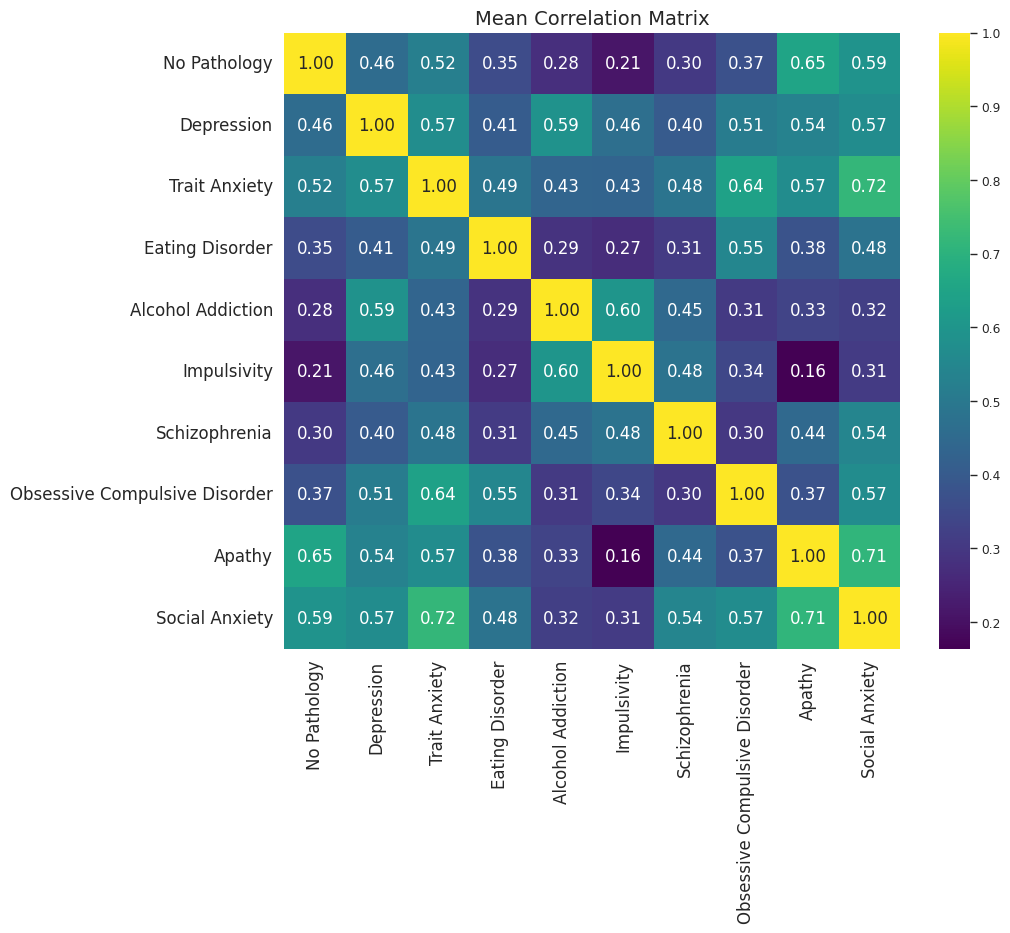

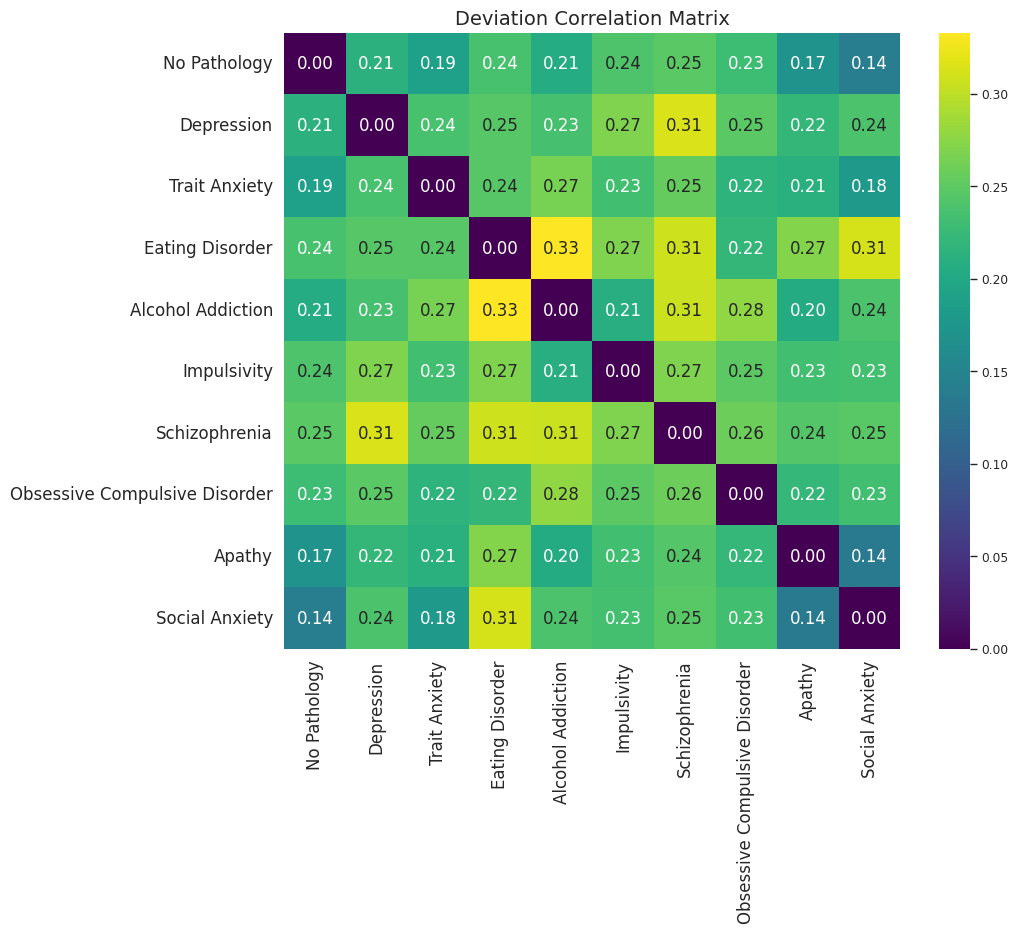

In [6]:
sns.set_theme(context='paper', style='white')

if prompt_technique == "chain":
    prompt_technique_m = "Chain"
elif prompt_technique == "naive":
    prompt_technique_m = "Naive"
elif prompt_technique == "react":
    prompt_technique_m = "React"

plt.figure(figsize=(10, 8))
av_m = sns.heatmap(average_matrix, annot=True, fmt=".2f", cmap='viridis', cbar=True, square=True, annot_kws={"size": 12})
plt.title(f'Mean Correlation Matrix', fontsize=14)
plt.xlabel('')
plt.ylabel('')
av_m.set_xticklabels(av_m.get_xticklabels(), fontsize=12)
av_m.set_yticklabels(av_m.get_yticklabels(), fontsize=12, rotation=0)
plt.show()

plt.figure(figsize=(10, 8))
std_m = sns.heatmap(matrix_deviation, annot=True, fmt=".2f", cmap='viridis', cbar=True, square=True, annot_kws={"size": 12})
plt.title(f'Deviation Correlation Matrix', fontsize=14)
plt.xlabel('')
plt.ylabel('')
std_m.set_xticklabels(std_m.get_xticklabels(), fontsize=12)
std_m.set_yticklabels(std_m.get_yticklabels(), fontsize=12, rotation=0)
plt.show()
                                                                                                                                             